In [2]:

from environments.pickplace_environment_residual import ResPickOrPlaceEnvWithoutLangReward
from tasks.letter import PutblockonBowlSameColor
import numpy as np
import matplotlib.pyplot as plt
from agents.LLMRL import LLMSAC,GuideSAC
import cv2

pybullet build time: May 20 2022 19:44:17
2023-12-13 22:37:12.303440: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 22:37:12.336279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 22:37:13.464979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
env = ResPickOrPlaceEnvWithoutLangReward(
                                        task= PutblockonBowlSameColor,
                                         image_obs=True,
                                         residual=True,
                                         observation_noise=0,
                                         render=True,
                                         multi_discrete=False,
                                         scale_action=True,
                                         ee="suction",
                                         scale_obs=True,
                                         neglect_steps=False,
                                         one_hot_action = True)

startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Intel
GL_RENDERER=Mesa Intel(R) UHD Graphics (TGL GT1)
GL_VERSION=4.6 (Core Profile) Mesa 23.0.4-0ubuntu1~22.04.1
GL_SHADING_LANGUAGE_VERSION=4.60
pthread_getconcurrency()=0
Version = 4.6 (Core Profile) Mesa 23.0.4-0ubuntu1~22.04.1
Vendor = Intel
Renderer = Mesa Intel(R) UHD Graphics (TGL GT1)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started


In [4]:
BOUNDS = np.float32([[-0.3, 0.3], [-0.8, -0.2], [0, 0.15]])
pos_list = {
    "blue block": [0., -0.5, 0.0],
    "green block": [0.25, -0.4, 0.03],
    "yellow block": [-0.1, -0.4, 0.0],
    "blue bowl": [0.25, -0.4, 0.03],
    "green bowl": [-0.05, -0.55, 0.0],
    "yellow bowl": [0.15, -0.3, 0.0],
}
obs,_ = env.reset_withpos(pos_list=pos_list)
#remove lang_goal from obs
del obs["lang_goal"]
print(obs["object_in_hand"])
print(obs["image"])
reset_obs = obs.copy()

ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
ven = Intel
Workaround for some crash in the Intel OpenGL driver on Linux/Ubuntu
[False]
[0.33482143 0.33482143 0.31696429 0.89285714 0.5        0.5
 0.16517857 0.70982143 0.58482143 0.375      0.33482143 0.875     ]


In [5]:
model = LLMSAC.load("tmp/llmsac_imgatten_withnoise_PutblockonBowlSameColorseed0_model/rl_model_80000_steps.zip")

/media/marunyu/Data/study/DELFT/master_thesis/RA/venv/lib/python3.8/site-packages/stable_baselines3/common/buffers.py:590: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 12.05GB > 3.38GB
  warnings.warn(


In [6]:
act = model.predict(obs, deterministic=True)
print(act)
obs,_,_,_,_ = env.step(act[0])
del obs["lang_goal"]
for i in obs.keys():
    print(i)
    print(np.linalg.norm(reset_obs[i].astype(float)-obs[i].astype(float)))
print(obs["object_in_hand"])
print(obs["image"])


(array([0.01456138, 0.961753  , 0.5538709 , 0.39498058, 0.41294014,
       0.21566832, 0.11456174, 0.17997694, 0.30545044], dtype=float32), None)
object_in_hand
1.0
rgbd
0.0
image
0.36813443085871966
[ True]
[-0.00446429  0.47767857  0.31696429  0.89285714  0.5         0.5
  0.16517857  0.70982143  0.58482143  0.375       0.33482143  0.875     ]


(240, 240, 3)


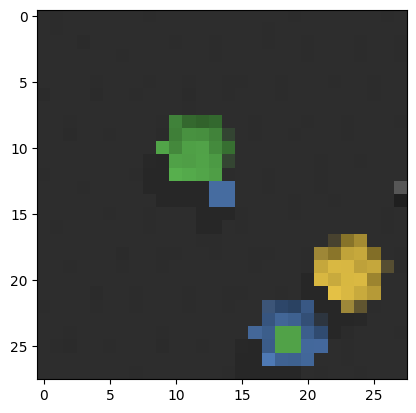

XIO:  fatal IO error 62 (Timer expired) on X server ":0"
      after 16307 requests (16307 known processed) with 0 events remaining.


: 

In [10]:
image = env.get_camera_image_top()
print(image.shape)
image = cv2.resize(image, (28, 28))
plt.imshow(image)